# Hydrogen Line Ratio Analysis

In [25]:
import numpy as np
import pyspeckit.spectrum.models.hydrogen as hh

Hummer & Storey give much different values than these; I think the pyspeckit tabulations are just wrong.  Ratios come out close though...

In [ ]:
hh.r_to_hbeta['pfundb'], hh.r_to_hbeta['bracketta']

In [61]:
# :2 means 'average the 5000 and 10000 K cases'
pfb_to_bra = (hh.r_to_hbeta['pfundb'] / hh.r_to_hbeta['bracketta'])[:2].mean()
pfb_to_bra, (hh.r_to_hbeta['pfundb'] / hh.r_to_hbeta['bracketta'])[:2].std()

(0.2036392153516345, 0.005323419646503458)

In [148]:
from pyspeckit.spectrum.models.hydrogen import retrieve_storey1995

In [149]:
d1e4 = retrieve_storey1995()
d1e41e4 = d1e4[10000., 1, 10000.0, 'B', 2, 65]
d1e41e4[(11,6)] / d1e41e4[(4,2)]

0.002467741935483871

In [153]:
pfb_to_bra =  d1e41e4[(7,5)] / d1e41e4[(5,4)]
pfb_to_bra

0.20283996683250416

In [154]:
hue_to_pfb = d1e41e4[11,6] / d1e41e4[7,5]
hue_to_pfb

0.15636177823198774

In [155]:
pfhe_to_bra = (d1e41e4[11,6] + d1e41e4[7,5]) / d1e41e4[5,4]
pfhe_to_bra

0.2345563847429519

In [156]:
from astropy import units as u
import dust_extinction
from dust_extinction.averages import RRP89_MWGC, CT06_MWGC, F11_MWGC, G21_MWAvg
from dust_extinction.parameter_averages import CCM89

In [157]:
CT06_MWGC()(4.05*u.um), CT06_MWGC()(4.66*u.um)

(0.054328959999999996, 0.04927807725321888)

In [158]:
A405 = CT06_MWGC()(4.05*u.um)
A466 = CT06_MWGC()(4.66*u.um)
AV = 30
pfb_to_bra_av30 = 10**(-(A466 - A405)*AV / 2.5) * pfb_to_bra
pfb_to_bra_av30

0.23321910470499274

In [159]:
pfbhe_to_bra_av30 = 10**(-(A466 - A405)*AV / 2.5) * pfhe_to_bra
pfbhe_to_bra_av30

0.2696856586343375

In [160]:
from astropy.io import fits
import reproject

In [7]:
basepath = '/orange/adamginsburg/jwst/brick/'

In [8]:
f466ns = fits.getdata(f'{basepath}/images/F466_minus_F410cont_refitted466wcsto410_merged_destarred6.fits')
f405ns = fits.getdata(f'{basepath}/images/F405_minus_F410cont_refitted405wcsto410_merged_destarred6.fits')

In [10]:
%matplotlib inline
import pylab as pl

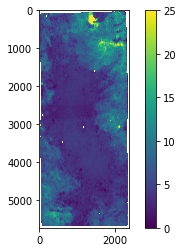

In [19]:
pl.imshow(f466ns, vmax=25)
pl.colorbar();

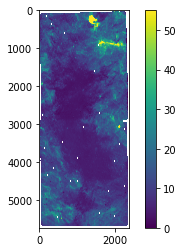

In [22]:
pl.imshow(f405ns, vmax=55, vmin=0)
pl.colorbar();

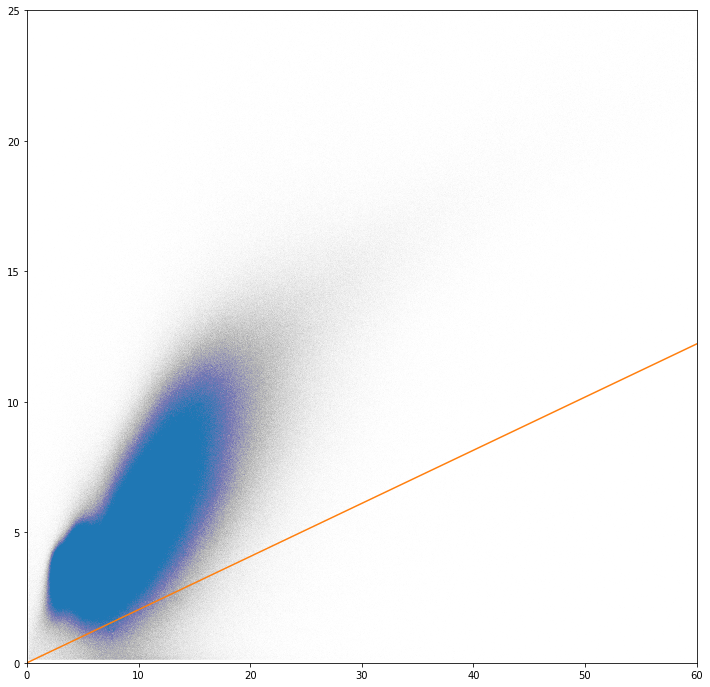

In [30]:
pl.figure(figsize=(12,12))
sel = (f466ns > 0.1) & (f466ns < 50)  & (f405ns > 0.1) & (f405ns < 150)
pl.plot(f405ns[sel], f466ns[sel], ',', alpha=0.005)
x = np.linspace(0,150)
pl.plot(x, x * pfb_to_bra)
pl.axis([0,60,0,25]);

In [31]:
import mpl_plot_templates

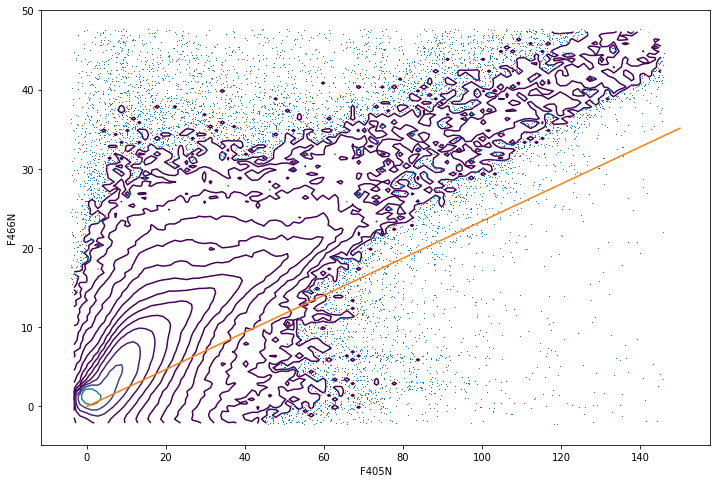

In [54]:
pl.figure(figsize=(12,8))
# try removing a background of ~10th percentile.... no apparent effect
mpl_plot_templates.adaptive_param_plot(f405ns[sel] - np.nanpercentile(f405ns, 10), f466ns[sel] - np.nanpercentile(f466ns, 10), bins=100, marker=',', ncontours=15);
pl.plot(x, x * pfb_to_bra_av30)
pl.ylabel("F466N");
pl.xlabel("F405N");